In [1]:
#model note-book
#this is the model note book in age gender detector .here we extracting data  and fit into aur model.


In [2]:
import tensorflow as tf
import numpy
import cv2
import numpy as np       
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense,MaxPooling2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop

In [3]:
fldr=r"C:\Users\Rahul\Desktop\Age-gender-detector\archive (2)\UTKFace"

In [4]:
import os
files=os.listdir(fldr)

In [5]:
#create list of iimages from the dataset
ages=[]
genders=[]
images=[]

for file in files:
    age=int(file.split('_')[0])
    gender=int(file.split('_')[1])
    total=fldr +'/'+file
    print(total)
    image=cv2.imread(total)

    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(48,48))
    images.append(image)



C:\Users\Rahul\Desktop\Age-gender-detector\archive (2)\UTKFace/100_1_0_20170110183726390.jpg.chip.jpg
C:\Users\Rahul\Desktop\Age-gender-detector\archive (2)\UTKFace/100_1_0_20170112213001988.jpg.chip.jpg
C:\Users\Rahul\Desktop\Age-gender-detector\archive (2)\UTKFace/100_1_0_20170112213303693.jpg.chip.jpg
C:\Users\Rahul\Desktop\Age-gender-detector\archive (2)\UTKFace/100_1_0_20170112215032192.jpg.chip.jpg
C:\Users\Rahul\Desktop\Age-gender-detector\archive (2)\UTKFace/100_1_0_20170117195420803.jpg.chip.jpg
C:\Users\Rahul\Desktop\Age-gender-detector\archive (2)\UTKFace/100_1_0_20170119212053665.jpg.chip.jpg
C:\Users\Rahul\Desktop\Age-gender-detector\archive (2)\UTKFace/100_1_2_20170105174847679.jpg.chip.jpg
C:\Users\Rahul\Desktop\Age-gender-detector\archive (2)\UTKFace/100_1_2_20170112213615815.jpg.chip.jpg
C:\Users\Rahul\Desktop\Age-gender-detector\archive (2)\UTKFace/100_1_2_20170112222336458.jpg.chip.jpg
C:\Users\Rahul\Desktop\Age-gender-detector\archive (2)\UTKFace/101_0_0_20170112213

In [6]:
#crreate list of age and gender fron the dataset
for file in files:
    age=int(file.split('_')[0])
    gender=int(file.split('_')[1])
    ages.append(age)
    genders.append(gender)

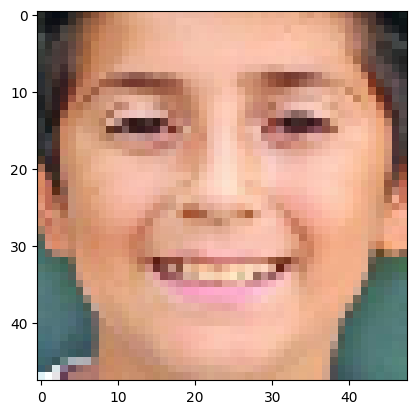

In [7]:
plt.imshow(images[99])

In [8]:
print(ages[99])

10


saving images, age and genders 


In [9]:
images_f=np.array(images)
age_f=np.array(ages)
genders_f=np.array(genders)

In [58]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'ages.npy',age_f)
np.save(fldr+'genders.npy',genders_f)

Finding the no.of male and female samples

In [11]:
values,counts=np.unique(genders_f,return_counts=True)
print(counts)

[12389 11317]


plotting the no. of males and females

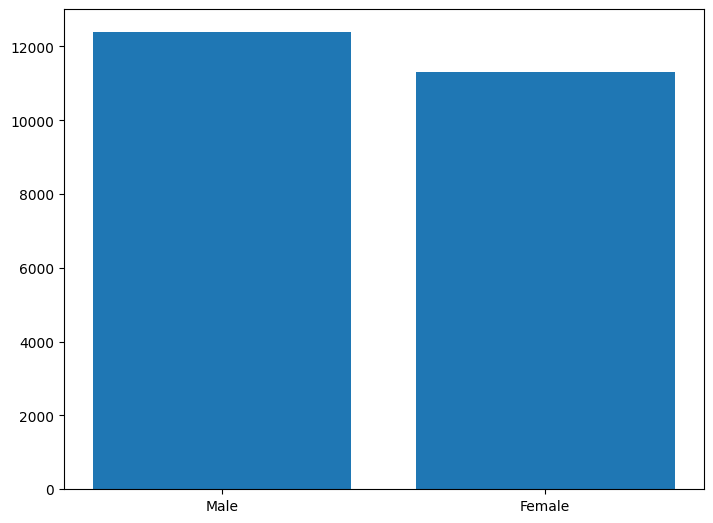

In [12]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
values=[12389,11317]
ax.bar(gender,values)
plt.show()


the number of samples in each age 


In [13]:
values,counts=np.unique(age_f,return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9    9    2
    1    5    5    1    3    4]


converting the age counts to lists

In [14]:
val=values.tolist()
cnt=counts.tolist()


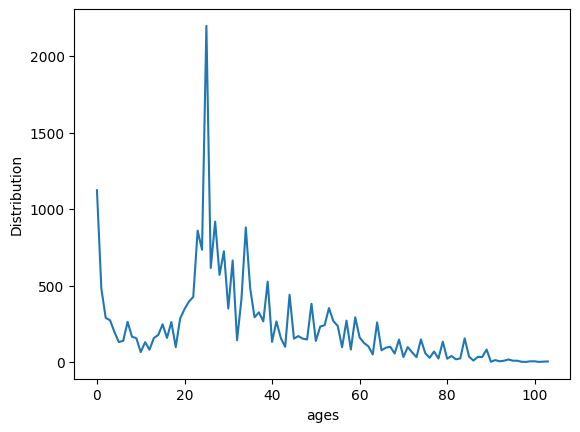

In [15]:
plt.plot(counts)
plt.xlabel('ages')
plt.ylabel('Distribution')
plt.show()

Defining labels or op

In [16]:
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1


creating another list of img from existing one

for better learning

In [17]:
images_f_2=images_f/255


In [18]:
images_f_2.shape

(23706, 48, 48, 3)

In [19]:
labels_f=np.array(labels)


In [21]:
labels=np.array(labels)

splitting the data set into test and train

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(images_f_2,labels_f,test_size=0.25)

In [24]:
Y_train[0:5]

array([[78,  0],
       [58,  0],
       [42,  0],
       [24,  0],
       [24,  0]])

sliptting 'y-test' and 'y-train' further for better understanding 
 

In [25]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [26]:
Y_train_2[0][0:5]

array([0, 0, 0, 0, 0])

In [27]:
Y_train_2[1][0:5]

array([78, 58, 42, 24, 24])

defining the model 

In [28]:
def Convolution(input_tensor,filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x


In [29]:
def model(input_shape):
    inputs=Input((input_shape))
    conv_1=Convolution(inputs,32)
    maxp_1=MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(maxp_1,64)
    maxp_2=MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution(maxp_2,128)
    maxp_3=MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(maxp_3,256)
    maxp_4=MaxPooling2D(pool_size=(2,2))(conv_4)
    flatten=Flatten()(maxp_4)
    dense_1=Dense(64,activation='relu')(flatten)
    dense_2=Dense(64,activation='relu')(flatten)
    drop_1=Dropout(0.2)(dense_1)
    drop_2=Dropout(0.2)(dense_2)
    output_1=Dense(1,activation='sigmoid',name='sex_out')(drop_1)
    output_2=Dense(1,activation='relu',name='age_out')(drop_2)
    model=Model(inputs=[inputs],outputs=[output_1,output_2])
    model.compile(loss=["binary_crossentropy","mae"],optimizer="Adam",metrics=["accuracy","accuracy"])
    return model

In [30]:
Model=model((48,48,3))

In [31]:
Model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 48, 48,    │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 48, 48,    │          0 │ conv2d[0][0]      │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 48, 48,    │          0 │ dropout[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 24, 24,    │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 24, 24,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 24, 24,    │          0 │ conv2d_1[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 24, 24,    │          0 │ dropout_1[0][0]   │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 12, 12,    │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 12, 12,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 12, 12,    │          0 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 12, 12,    │          0 │ dropout_2[0][0]   │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 6, 6, 128) │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 6, 6, 256) │    295,168 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 6, 6, 256) │          0 │ conv2d_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 6, 6, 256) │          0 │ dropout_3[0][0]   │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 3, 3, 256) │          0 │ activation_3[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 683,586 (2.61 MB)

 Trainable params: 683,586 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint

initializing the model

In [33]:
fle_s='Model-age-gender_detector.keras'
checkpoint=ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False, mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

running the model
this will take some time

In [34]:
History = Model.fit(X_train, Y_train_2, batch_size=64, validation_data=(X_test, Y_test_2), epochs=250, callbacks=callback_list)


Epoch 1/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - age_out_accuracy: 0.0460 - loss: 19.0213 - sex_out_accuracy: 0.5499
Epoch 1: val_loss improved from inf to 17.14545, saving model to Model-age-gender_detector.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 64s 207ms/step - age_out_accuracy: 0.0460 - loss: 19.0149 - sex_out_accuracy: 0.5499 - val_age_out_accuracy: 0.0449 - val_loss: 17.1455 - val_sex_out_accuracy: 0.5288
Epoch 2/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - age_out_accuracy: 0.0488 - loss: 15.5731 - sex_out_accuracy: 0.5401
Epoch 2: val_loss improved from 17.14545 to 13.82241, saving model to Model-age-gender_detector.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 55s 199ms/step - age_out_accuracy: 0.0488 - loss: 15.5700 - sex_out_accuracy: 0.5403 - val_age_out_accuracy: 0.0449 - val_loss: 13.8224 - val_sex_out_accuracy: 0.7289
Epoch 3/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - age_out_accuracy: 0.0471 - loss: 12.1077 - sex_out_accuracy: 0.7179
Epoch 3: val_loss improved from 13

model evaluation

In [35]:
Model.evaluate(X_test,Y_test_2)

186/186 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - age_out_accuracy: 0.0399 - loss: 7.5039 - sex_out_accuracy: 0.8940


[7.5699052810668945, 0.04487936571240425, 0.8915134072303772]

In [36]:
pred=Model.predict(X_test)

186/186 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step


In [37]:
pred[1]

array([[36.06427 ],
       [29.832605],
       [21.006763],
       ...,
       [33.74319 ],
       [26.524446],
       [48.52121 ]], dtype=float32)

plotting loss

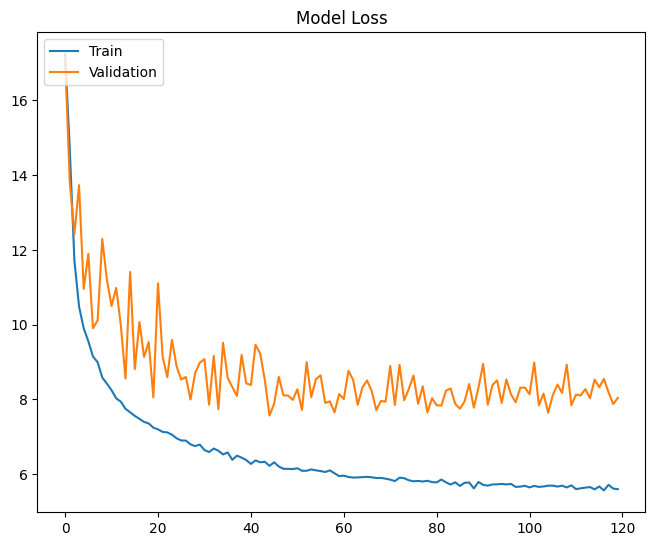

In [38]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

plotting sex accuracy

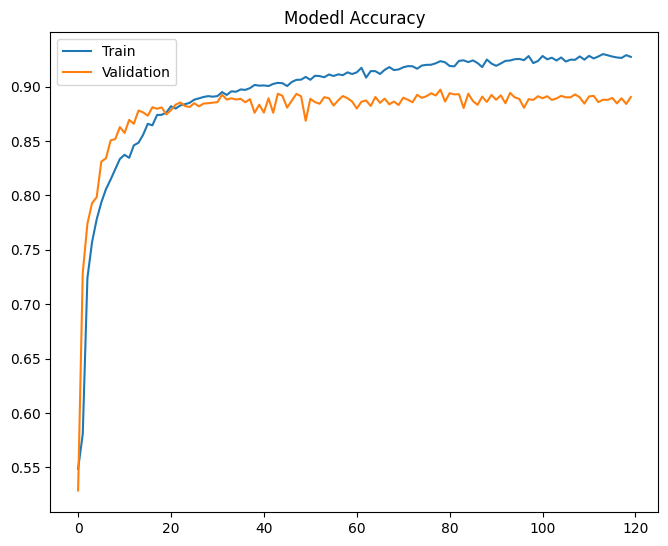

In [39]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Modedl Accuracy')
plt.xlabel=('Epoch')
plt.ylabel=('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

plotting gender accuracy

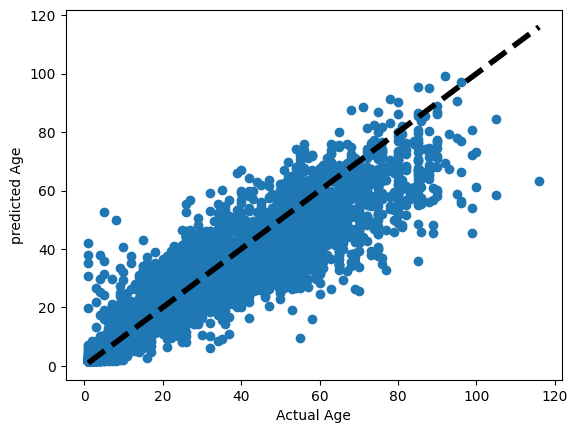

In [40]:
fig,ax=plt.subplots()
ax.scatter(Y_test_2[1],pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()],[Y_test_2[1].min(),Y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('predicted Age')
plt.show()


making report of the model (gender only)

In [41]:
i=0
pred_1=[]
while(i<len(pred[0])):
    pred_1.append(int(np.round(pred[0][i])))
    i=i+1

C:\Users\Rahul\AppData\Local\Temp\ipykernel_9108\463674450.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_1.append(int(np.round(pred[0][i])))


In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [44]:
report =classification_report(Y_test_2[0],pred_1)

In [45]:
print(report)

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      3134
           1       0.88      0.89      0.89      2793

    accuracy                           0.89      5927
   macro avg       0.89      0.89      0.89      5927
weighted avg       0.89      0.89      0.89      5927



making heatmap of the model  (Gender only)

In [46]:
results=confusion_matrix(Y_test_2[0],pred_1)

<Axes: >

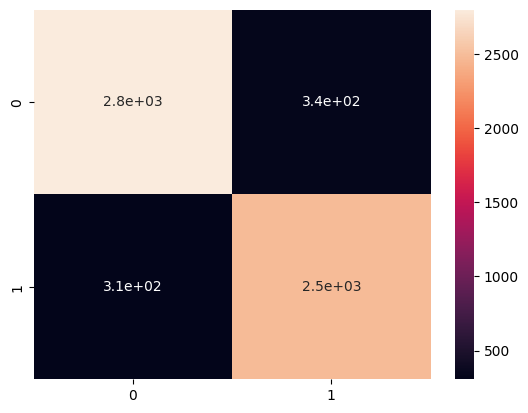

In [48]:
import seaborn as sns
sns.heatmap(results,annot=True)

testing the images or cel

In [49]:
def test_image(ind,image_f,images_f_2,Model):
    plt.imshow(image_f[ind])
    image_test=images_f_2[ind]
    pred_1=Model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(pred_1[1][0]))
    sex=int(np.round(pred_1[0][0]))
    print("Predicted Age is "+str(age))
    print("Predicted gender is "+sex_f[sex])

Test 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted Age is 97
Predicted gender is Female


C:\Users\Rahul\AppData\Local\Temp\ipykernel_9108\3392093397.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_1[1][0]))
C:\Users\Rahul\AppData\Local\Temp\ipykernel_9108\3392093397.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_1[0][0]))


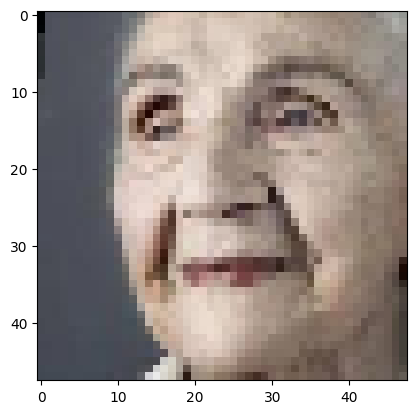

In [55]:
test_image(4,images_f,images_f_2,Model)

test 2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted Age is 20
Predicted gender is Male


C:\Users\Rahul\AppData\Local\Temp\ipykernel_9108\3392093397.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_1[1][0]))
C:\Users\Rahul\AppData\Local\Temp\ipykernel_9108\3392093397.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_1[0][0]))


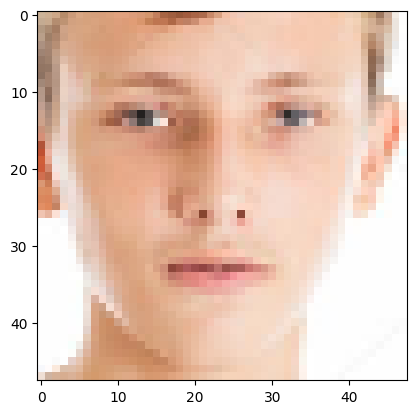

In [51]:
test_image(23,images_f,images_f_2,Model)

test 3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Age is 11
Predicted gender is Female


C:\Users\Rahul\AppData\Local\Temp\ipykernel_9108\3392093397.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_1[1][0]))
C:\Users\Rahul\AppData\Local\Temp\ipykernel_9108\3392093397.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_1[0][0]))


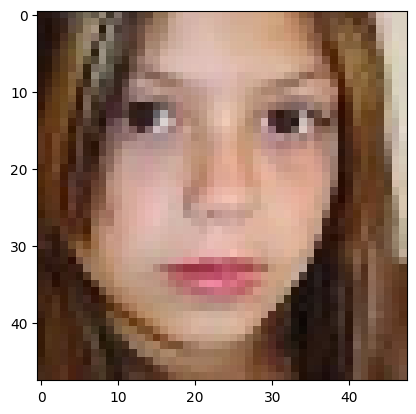

In [52]:
test_image(168,images_f,images_f_2,Model)

test 4

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Age is 22
Predicted gender is Male


C:\Users\Rahul\AppData\Local\Temp\ipykernel_9108\3392093397.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_1[1][0]))
C:\Users\Rahul\AppData\Local\Temp\ipykernel_9108\3392093397.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_1[0][0]))


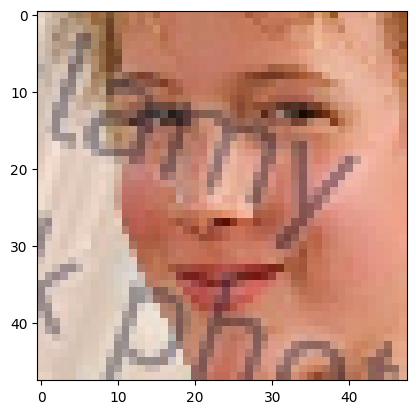

In [53]:
test_image(888,images_f,images_f_2,Model)

test 5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted Age is 17
Predicted gender is Female


C:\Users\Rahul\AppData\Local\Temp\ipykernel_9108\3392093397.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_1[1][0]))
C:\Users\Rahul\AppData\Local\Temp\ipykernel_9108\3392093397.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_1[0][0]))


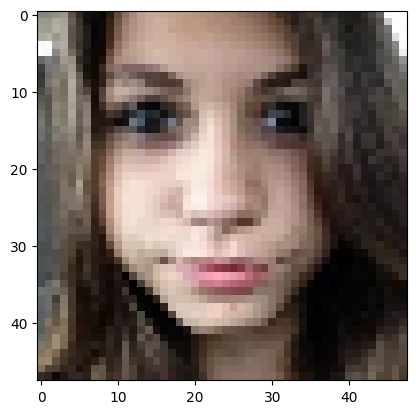

In [54]:
test_image(1288,images_f,images_f_2,Model)